<a href="https://colab.research.google.com/github/Ge0f3/Tensorflow-Models/blob/master/Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tf-nightly-gpu
!pip install "tensorflow_hub==0.4.0"
!pip install -U tensorflow_datasets

     |████████████████████████████████| 371.4MB 48kB/s 
     |████████████████████████████████| 3.2MB 37.2MB/s 
     |████████████████████████████████| 501kB 39.2MB/s 
     |████████████████████████████████| 686kB 2.9MB/s 


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pylab as plt

import tensorflow as tf
tf.enable_eager_execution()

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers

In [0]:
import logging
import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


In [4]:
#Loading the images 
#Loading the image dataste
_URL = 'https://5411-image-set.s3.amazonaws.com/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=True)
print(zip_dir)

68608000/68606236 [==============================] - 1s 0us/step
/root/.keras/datasets/cats_and_dogs_filtered.zip


In [0]:
#Training and Testing directory 
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [0]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 224  # Our training data consists of images with width of 150 pixels and height of 150 pixels
train_image_generator      = ImageDataGenerator(rescale=1./255,
                                               rotation_range=40,
                                                            width_shift_range=0.2,
                                                            height_shift_range=0.2,
                                                            shear_range=0.2,
                                                            zoom_range=0.2,
                                                            horizontal_flip=True,
                                                            fill_mode='nearest')  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

In [7]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE, 
                                                           directory=train_dir, 
                                                           shuffle=True, 
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150) 
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [8]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE, 
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
#loading the state of art neural network 
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"

IMAGE_RES = 224

feature_extractor =  hub.KerasLayer(URL,input_shape = (IMAGE_RES,IMAGE_RES,3))

In [10]:
feature_extractor

In [0]:
#Freezing so that the training modeifies only the final layer
feature_extractor.trainable = False

In [12]:
model = tf.keras.Sequential([
    feature_extractor,
    layers.Dense(2,activation='softmax')
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
EPOCHS=7
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=10,
    epochs=EPOCHS,
    validation_data = val_data_gen,
    validation_steps = 20
)

Epoch 1/7
10/10 [==============================] - 30s 3s/step - loss: 0.2484 - acc: 0.9370 - val_loss: 0.1743 - val_acc: 0.9680
Epoch 2/7
10/10 [==============================] - 24s 2s/step - loss: 0.2527 - acc: 0.9290 - val_loss: 0.1753 - val_acc: 0.9700
Epoch 3/7
10/10 [==============================] - 24s 2s/step - loss: 0.2339 - acc: 0.9370 - val_loss: 0.1784 - val_acc: 0.9650
Epoch 4/7
10/10 [==============================] - 24s 2s/step - loss: 0.2474 - acc: 0.9310 - val_loss: 0.1853 - val_acc: 0.9650
Epoch 5/7
10/10 [==============================] - 24s 2s/step - loss: 0.2419 - acc: 0.9270 - val_loss: 0.1790 - val_acc: 0.9660
Epoch 6/7
10/10 [==============================] - 24s 2s/step - loss: 0.2338 - acc: 0.9420 - val_loss: 0.1805 - val_acc: 0.9670
Epoch 7/7
10/10 [==============================] - 24s 2s/step - loss: 0.2268 - acc: 0.9470 - val_loss: 0.1829 - val_acc: 0.9670


In [21]:
history.history

{'acc': [0.937, 0.929, 0.937, 0.931, 0.927, 0.942, 0.947],
 'loss': [0.24841633439064026,
  0.252740877866745,
  0.23391921073198318,
  0.2473849058151245,
  0.2418961003422737,
  0.23375795930624008,
  0.22680882066488267],
 'val_acc': [0.968, 0.97, 0.965, 0.965, 0.966, 0.967, 0.967],
 'val_loss': [0.1742973044514656,
  0.17525361478328705,
  0.1783607169985771,
  0.18525294885039328,
  0.17903222292661666,
  0.18045716732740402,
  0.18288397341966628]}

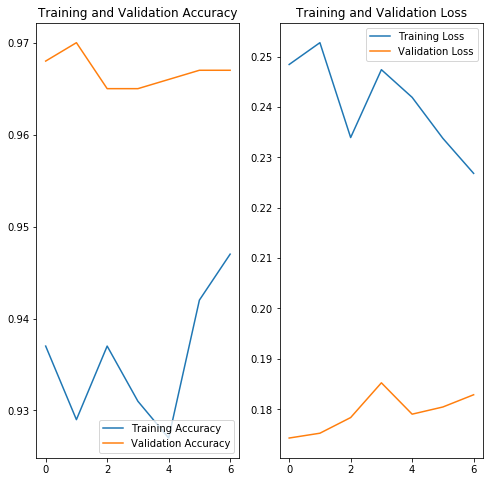

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()